
#  Training with customdataset 1

In [21]:
# Imports
import pathlib
import torch

import albumentations
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from skimage.transform import resize
from customdatasets import SegmentationDataSet1
from transformations import ComposeDouble, AlbuSeg2d, FunctionWrapperDouble, normalize_01, create_dense_target
from unet import UNet
from trainer import Trainer


# root directory
root = pathlib.Path.cwd() / 'Carvana'
# root = pathlib.Path.cwd() / 'Door'


def get_filenames_of_path(path: pathlib.Path, ext: str = '*'):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames


# input and target files
inputs = get_filenames_of_path(root / 'Input')
targets = get_filenames_of_path(root / 'Target')

# training transformations and augmentations
transforms_training = ComposeDouble([
    # FunctionWrapperDouble(resize,
    #                       input=True,
    #                       target=False,
    #                       output_shape=(128, 128, 3)),
    # FunctionWrapperDouble(resize,
    #                       input=False,
    #                       target=True,
    #                       output_shape=(128, 128),
    #                       order=0,
    #                       anti_aliasing=False,
    #                       preserve_range=True),
    # AlbuSeg2d(albumentations.HorizontalFlip(p=0.5)),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    # FunctionWrapperDouble(np.expand_dims, input=True, target=False, axis=0),
    FunctionWrapperDouble(normalize_01)
])

# validation transformations
transforms_validation = ComposeDouble([
    # FunctionWrapperDouble(resize,
    #                       input=True,
    #                       target=False,
    #                       output_shape=(128, 128, 3)),
    # FunctionWrapperDouble(resize,
    #                       input=False,
    #                       target=True,
    #                       output_shape=(128, 128),
    #                       order=0,
    #                       anti_aliasing=False,
    #                       preserve_range=True),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    # FunctionWrapperDouble(np.expand_dims, input=True, target=False, axis=0),
    FunctionWrapperDouble(normalize_01)
])

# random seed
random_seed = 42

# split dataset into training set and validation set
train_size = 0.8  # 80:20 split

inputs_train, inputs_valid = train_test_split(
    inputs,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

targets_train, targets_valid = train_test_split(
    targets,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

# inputs_train, inputs_valid = inputs[:80], inputs[80:]
# targets_train, targets_valid = targets[:80], targets[:80]

# dataset training
dataset_train = SegmentationDataSet1(inputs=inputs_train,
                                    targets=targets_train,
                                    transform=transforms_training)

# dataset validation
dataset_valid = SegmentationDataSet1(inputs=inputs_valid,
                                    targets=targets_valid,
                                    transform=transforms_validation)

# dataloader training
dataloader_training = DataLoader(dataset=dataset_train,
                                 batch_size=2,
                                 shuffle=True)

# dataloader validation
dataloader_validation = DataLoader(dataset=dataset_valid,
                                   batch_size=2,
                                   shuffle=True)

In [22]:
# create DatasetViewer instances
from visual import DatasetViewer
dataset_viewer_training = DatasetViewer(dataset_train)
dataset_viewer_validation = DatasetViewer(dataset_valid)

In [17]:
# open napari instance for training dataset
# navigate with 'n' for next and 'b' for back on the keyboard
dataset_viewer_training.napari()

In [18]:
# open napari instance for validation dataset
# navigate with 'n' for next and 'b' for back on the keyboard
dataset_viewer_validation.napari()

In [ ]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# model
model = UNet(in_channels=3,
             out_channels=2,
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
kk             dim=2).to(device)

# from torchsummary import summary
# summary = summary(model, (1, 64, 64), device='cpu')
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
# criterion
criterion = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# trainer
trainer = Trainer(model=model,
                  device=device,
                  criterion=criterion,
                  optimizer=optimizer,
                  training_DataLoader=dataloader_training,
                  validation_DataLoader=dataloader_validation,
                  lr_scheduler=None,
                  epochs=2,
                  epoch=0,
                  notebook=True)

# start training
training_losses, validation_losses, lr_rates = trainer.run_trainer()

Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

# Training with customdataset 2

In [8]:
# Imports
import pathlib
from transformations import ComposeDouble, normalize_01, AlbuSeg2d, FunctionWrapperDouble, create_dense_target
from sklearn.model_selection import train_test_split
from customdatasets import SegmentationDataSet2
import torch
import numpy as np
from unet import UNet
from trainer import Trainer
from torch.utils.data import DataLoader
from skimage.transform import resize
import albumentations

# root directory
root = pathlib.Path.cwd() / 'Carvana'
def get_filenames_of_path(path: pathlib.Path, ext: str = '*'):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames

# input and target files
inputs = get_filenames_of_path(root / 'Input')
targets = get_filenames_of_path(root / 'Target')

# pre-transformations
pre_transforms = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
])

# training transformations and augmentations
transforms_training = ComposeDouble([
    AlbuSeg2d(albumentations.HorizontalFlip(p=0.5)),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# validation transformations
transforms_validation = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# random seed
random_seed = 42

# split dataset into training set and validation set
train_size = 0.8  # 80:20 split

inputs_train, inputs_valid = train_test_split(
    inputs,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

targets_train, targets_valid = train_test_split(
    targets,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

# inputs_train, inputs_valid = inputs[:80], inputs[80:]
# targets_train, targets_valid = targets[:80], targets[:80]

# dataset training
dataset_train = SegmentationDataSet2(inputs=inputs_train,
                                    targets=targets_train,
                                    transform=transforms_training,
                                    use_cache=True,
                                    pre_transform=pre_transforms)

# dataset validation
dataset_valid = SegmentationDataSet2(inputs=inputs_valid,
                                    targets=targets_valid,
                                    transform=transforms_validation,
                                    use_cache=True,
                                    pre_transform=pre_transforms)

# dataloader training
dataloader_training = DataLoader(dataset=dataset_train,
                                 batch_size=2,
                                 shuffle=True)

# dataloader validation
dataloader_validation = DataLoader(dataset=dataset_valid,
                                   batch_size=2,
                                   shuffle=True)


Caching:   0%|          | 0/76 [00:00<?, ?it/s]

Caching:   0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
# create DatasetViewer instances
from visual import DatasetViewer
dataset_viewer_training = DatasetViewer(dataset_train)
dataset_viewer_validation = DatasetViewer(dataset_valid)

In [10]:
# open napari instance for training dataset
# navigate with 'n' for next and 'b' for back on the keyboard
dataset_viewer_training.napari()

In [11]:
# open napari instance for validation dataset
# navigate with 'n' for next and 'b' for back on the keyboard
dataset_viewer_validation.napari()

In [12]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    torch.device('cpu')

# model
model = UNet(in_channels=3,
             out_channels=2,
             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=2).to(device)

# criterion
criterion = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# trainer
trainer = Trainer(model=model,
                  device=device,
                  criterion=criterion,
                  optimizer=optimizer,
                  training_DataLoader=dataloader_training,
                  validation_DataLoader=dataloader_validation,
                  lr_scheduler=None,
                  epochs=10,
                  epoch=0,
                  notebook=True)

# start training
training_losses, validation_losses, lr_rates = trainer.run_trainer()

Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

# Training with customdataset 3

In [13]:
# Imports
import pathlib
from transformations import ComposeDouble, normalize_01, AlbuSeg2d, FunctionWrapperDouble, create_dense_target
from sklearn.model_selection import train_test_split
from customdatasets import SegmentationDataSet3
import torch
import numpy as np
from unet import UNet
from trainer import Trainer
from torch.utils.data import DataLoader
from skimage.transform import resize
import albumentations

# root directory
root = pathlib.Path.cwd() / 'Carvana'


def get_filenames_of_path(path: pathlib.Path, ext: str = '*'):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames


# input and target files
inputs = get_filenames_of_path(root / 'Input')
targets = get_filenames_of_path(root / 'Target')

# pre-transformations
pre_transforms = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
])

# training transformations and augmentations
transforms_training = ComposeDouble([
    AlbuSeg2d(albumentations.HorizontalFlip(p=0.5)),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# validation transformations
transforms_validation = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128, 3)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

# random seed
random_seed = 42

# split dataset into training set and validation set
train_size = 0.8  # 80:20 split

inputs_train, inputs_valid = train_test_split(
    inputs,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

targets_train, targets_valid = train_test_split(
    targets,
    random_state=random_seed,
    train_size=train_size,
    shuffle=True)

# inputs_train, inputs_valid = inputs[:80], inputs[80:]
# targets_train, targets_valid = targets[:80], targets[:80]

# dataset training
dataset_train = SegmentationDataSet3(inputs=inputs_train,
                                    targets=targets_train,
                                    transform=transforms_training,
                                    use_cache=True,
                                    pre_transform=pre_transforms)

# dataset validation
dataset_valid = SegmentationDataSet3(inputs=inputs_valid,
                                    targets=targets_valid,
                                    transform=transforms_validation,
                                    use_cache=True,
                                    pre_transform=pre_transforms)

# dataloader training
dataloader_training = DataLoader(dataset=dataset_train,
                                 batch_size=2,
                                 shuffle=True)

# dataloader validation
dataloader_validation = DataLoader(dataset=dataset_valid,
                                   batch_size=2,
                                   shuffle=True)

In [14]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# model
model = UNet(in_channels=3,
             out_channels=2,
             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=2).to(device)

# criterion
criterion = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# trainer
trainer = Trainer(model=model,
                  device=device,
                  criterion=criterion,
                  optimizer=optimizer,
                  training_DataLoader=dataloader_training,
                  validation_DataLoader=dataloader_validation,
                  lr_scheduler=None,
                  epochs=10,
                  epoch=0,
                  notebook=True)

# start training
training_losses, validation_losses, lr_rates = trainer.run_trainer()

Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

## Save the model

In [15]:
# save the model
model_name =  'carvana_model.pt'
torch.save(model.state_dict(), pathlib.Path.cwd() / model_name)

# Learning rate finder

In [16]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    torch.device('cpu')

# model
model = UNet(in_channels=3,
             out_channels=2,
             n_blocks=4,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=2).to(device)

# criterion
criterion = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
from lr_rate_finder import LearningRateFinder
lrf = LearningRateFinder(model, criterion, optimizer, device)
lrf.fit(dataloader_training, steps=1000)

Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

Training:   0%|          | 0/38 [00:00<?, ?it/s]

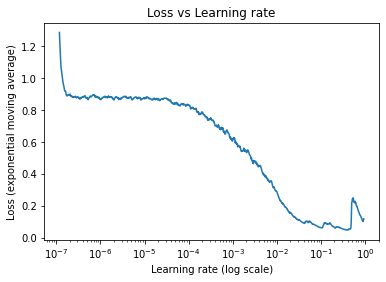

In [18]:
lrf.plot()

# Plot results

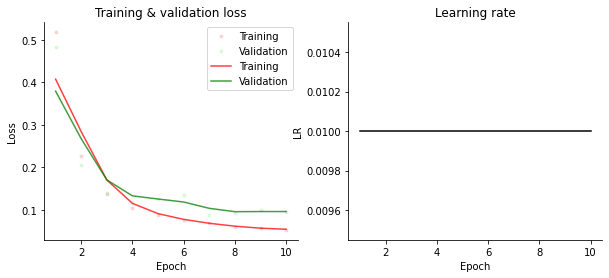

In [19]:
from visual import plot_training
fig = plot_training(training_losses, validation_losses, lr_rates, gaussian=True, sigma=1, figsize=(10, 4))